In [270]:
import py as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [271]:
img = cv2.imread("C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/test_images/paige.jpg")
img.shape

(2503, 2000, 3)

In [272]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



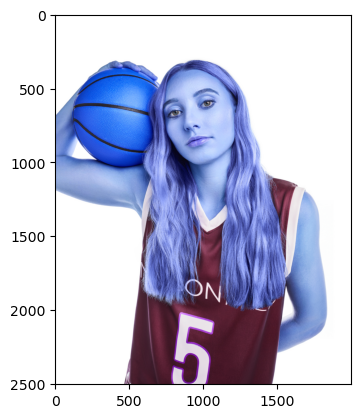

In [273]:
plt.imshow(img)

In [274]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)     #change to gray image
gray.shape

(2503, 2000)

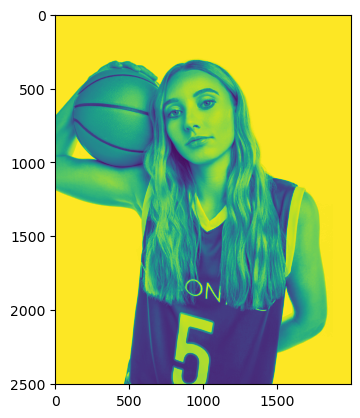

In [275]:
plt.imshow(gray)

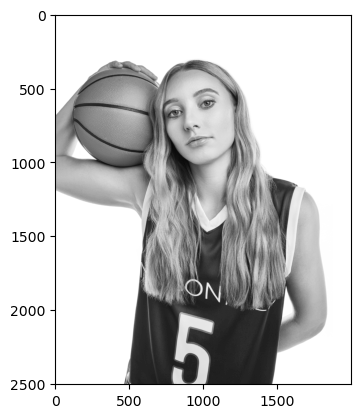

In [276]:
plt.imshow(gray,cmap='gray')

In [277]:
#we are using the haar cascade method for the face tdetection so we need to import the codes in the opencv folder
face_cascade=cv2.CascadeClassifier("C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/opencv/haarcascades/haarcascade_frontalface_default.xml") 
eye_cascade=cv2.CascadeClassifier("C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/opencv/haarcascades/haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[652, 409, 559, 559]])

In [278]:
(x,y,w,h)=faces[0]   #store face detected since its a 2d array
x,y,w,h

(652, 409, 559, 559)

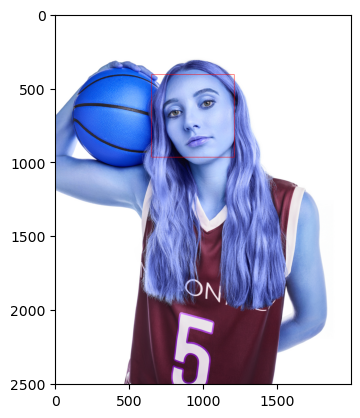

In [279]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)    #draw the rectangle on the original image like croppping 255-red triangle
plt.imshow(face_img)

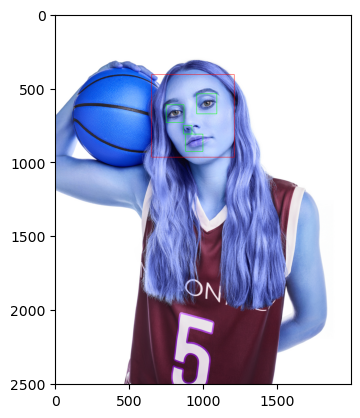

In [281]:
#from the haar cascade documentation for eyes detection
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

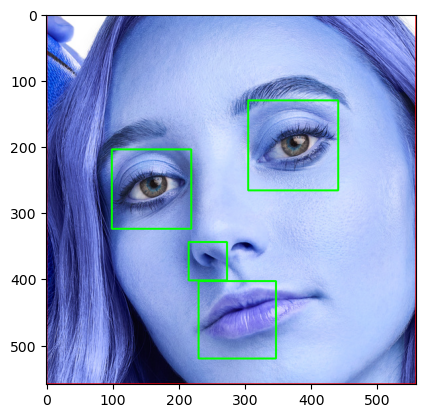

In [282]:
%matplotlib inline                 
plt.imshow(roi_color,cmap='gray')

In [283]:
def get_croppped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_color = img[y:y+h, x:x+w]
        return roi_color  

    return None
        

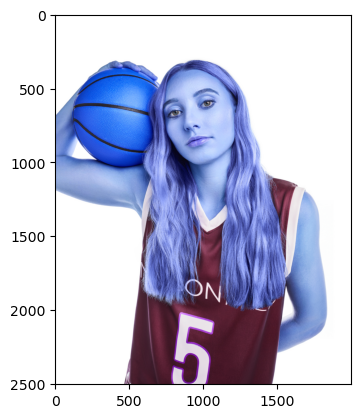

In [284]:
original_image=cv2.imread("C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/test_images/paige.jpg")
plt.imshow(original_image)

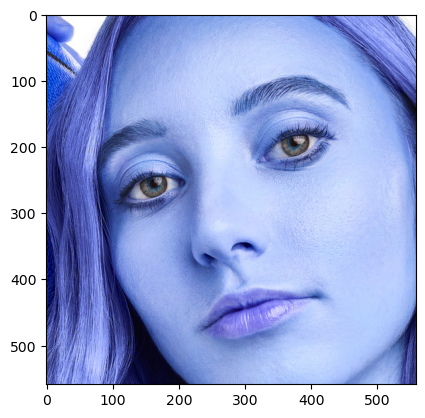

In [285]:
cropped_image=get_croppped_image_if_2_eyes("C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/test_images/paige.jpg")
plt.imshow(cropped_image)

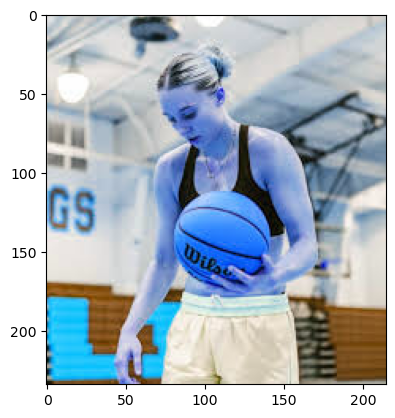

In [286]:
#use an obstructed image now
obstructed_image=cv2.imread("C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/test_images/ob.jpg")
plt.imshow(obstructed_image)

In [287]:
#no result coz the eyes are not visible(the face is obstructed) so we have to avoid to use such image
cropped_image_no_2_eyes=get_croppped_image_if_2_eyes("C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/test_images/ob.jpg")
cropped_image_no_2_eyes

In [288]:
path_to_data = "C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/"
path_to_cr_data="C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped"

In [289]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):        #go through the subdirectories within the dataset forlder(5)
    if entry.is_dir():
        img_dirs.append(entry.path)

In [290]:
img_dirs

['C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/aja_wilson',
 'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/angel_reese',
 'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/caitlin_clark',
 'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/coco_gauff',
 'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/paige_bueckers']

In [291]:
#create the crop folder
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)     #if folder exist remove
os.mkdir(path_to_cr_data)           #creating the folder

In [292]:
celebrity_file_names_dict = {
    'paige_bueckers': [
        "C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped/paige/paige1.png",
        "C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped/paige/paige2.png"
    ],
    
    'angel_reese': [
        "C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped/angel/angel1.png",
        "C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped/angel/angel2.png"
    ]
}


In [293]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]  # Getting the last part of the path as the celebrity name
    print(celebrity_name)
    
    # Initialize the dictionary entry for this celebrity name
    celebrity_file_names_dict[celebrity_name] = []
    
    # Now create a separate cropped image for the celebrities
    for entry in os.scandir(img_dir):
        roi_color = get_croppped_image_if_2_eyes(entry.path)
        if roi_color is not None:  # Save cropped image if eyes are detected
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            
            if not os.path.exists(cropped_folder):  # Create folder if it doesn’t exist
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)
                
            cropped_file_name = f"{celebrity_name}_{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            
            cv2.imwrite(cropped_file_path, roi_color)  # Save cropped image
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1


aja_wilson
Generating cropped images in folder: C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped\aja_wilson
Error: Unable to load image at C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/aja_wilson\29th-september-2022-sydney-homebush-new-south-wales-australia-womens-world-cup-basketball-usa-versus-serbia-aja-wilson-of-united-states-of-america-takes-a-free-shot-2K41NG6.jpg
Error: Unable to load image at C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/aja_wilson\las-vegas-nv-us-02nd-june-2019-a-las-vegas-center-aja-wilson-22-fights-for-position-the-wnba-game-between-the-connecticut-sun-and-the-las-vegas-aces-74-80-lost-at-mandalay-bay-ev.jpg
Error: Unable to load image at C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/aja_wilson\las-vegas-usa-08th-oct-2021-las-vegas-nv-october-8-las-vegas-aces-forward-aja-wilson-22-shoots-a-free-throw-during-game-5-of-the-wnba-semifinals-betwee

In [294]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    
    coeffs=pywt.wavedec2(imArray,mode, level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H[0] *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

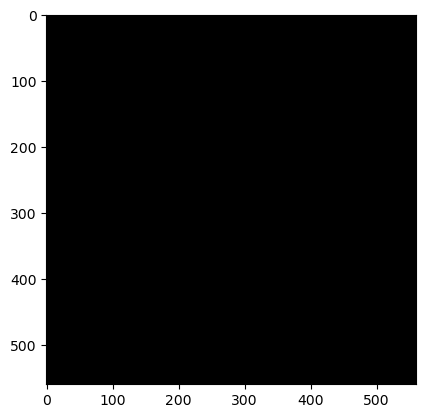

In [295]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [296]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict
        

{'cropped\\aja_wilson': ['C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped\\aja_wilson\\aja_wilson_1.png',
  'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped\\aja_wilson\\aja_wilson_10.png',
  'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped\\aja_wilson\\aja_wilson_11.png',
  'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped\\aja_wilson\\aja_wilson_12.png',
  'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped\\aja_wilson\\aja_wilson_13.png',
  'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped\\aja_wilson\\aja_wilson_14.png',
  'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped\\aja_wilson\\aja_wilson_15.png',
  'C:/Users/JIN/Documents/projects/code/SportsPersonClassifier/model/dataset/cropped\\aja_wilson\\aja_wilson_16.png',
  'C:/Users/JIN/Documents/projects

In [297]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict

{'cropped\\aja_wilson': 0,
 'cropped\\angel_reese': 1,
 'cropped\\caitlin_clark': 2,
 'cropped\\coco_gauff': 3,
 'cropped\\paige_bueckers': 4}

In [298]:
x=[]
y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():    #iterate through the dictionary, training files is the list of images
    for training_image in training_files:
        img = cv2.imread(training_image)                                #read the image using open cv since the above is just a path
        if img is None:
            continue
            
        img_har = w2d(img, 'db1', )                      # Transforming image using your wavelet function
        scalled_img_har = cv2.resize(img_har, (32, 32))  # Assuming this is already grayscale
        scalled_raw_img = cv2.resize(img, (32, 32))     # Resize original image to 32x32
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_img_har.reshape(32*32, 1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])


In [299]:
len(x[0])

4096

In [300]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(213, 4096)

In [301]:
x[0]

array([40., 17., 13., ...,  0.,  0.,  0.])

In [302]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [303]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)     #split x and y into training and test set

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)    #train machine model
pipe.score(x_test, y_test)   #check how accurate the model is

0.7407407407407407

In [304]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.71      1.00      0.83         5
           2       0.75      0.64      0.69        14
           3       1.00      0.88      0.93         8
           4       0.75      0.88      0.81        17

    accuracy                           0.74        54
   macro avg       0.74      0.76      0.74        54
weighted avg       0.74      0.74      0.73        54



In [305]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [306]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [307]:
scores = []
best_estimators = {}
import pandas as pd

#there is concept of train, test and validation data(hyperparameter -validation test, and test the perfomance - xtest)
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])   #scale the data and use the model to train
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)   #divide the dataset to the ones for training and the other dataset for testing
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])          #append the score in a list
df

,model,best_score,best_params
0,svm,0.641331,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.490927,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.659879,{'logisticregression__C': 1}


In [308]:
best_estimators     #a train model

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [309]:
best_estimators['svm'] #gives best perfomance

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [310]:
best_estimators['svm'].score(x_test,y_test)   #perfom best file different dataset

0.7592592592592593

In [311]:
best_estimators['random_forest'].score(x_test,y_test)

0.6296296296296297

In [312]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7962962962962963

In [313]:
best_clf = best_estimators['svm']   #best cclassifier is a train model

In [314]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 5,  0,  1,  0,  4],
       [ 0,  5,  0,  0,  0],
       [ 2,  1,  9,  0,  2],
       [ 0,  0,  0,  8,  0],
       [ 0,  1,  2,  0, 14]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

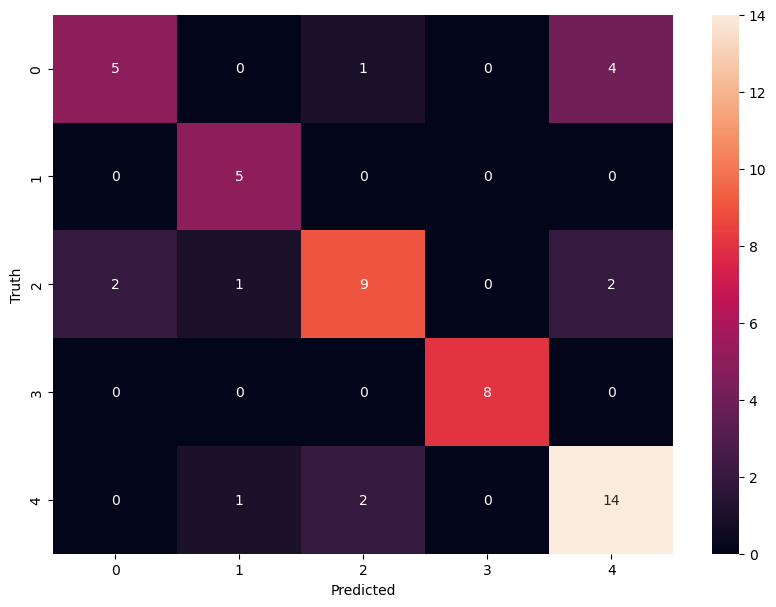

In [315]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [316]:
class_dict

{'cropped\\aja_wilson': 0,
 'cropped\\angel_reese': 1,
 'cropped\\caitlin_clark': 2,
 'cropped\\coco_gauff': 3,
 'cropped\\paige_bueckers': 4}

In [317]:
!pip install joblib
import joblib 
joblib.dump(best_clf, 'saved_model.pkl') # Save the model as a pickle in a file 


Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

In [318]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))